#

In [54]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit,  ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.transpiler.passes import ALAPScheduleAnalysis
from qiskit.transpiler import PassManager
from qiskit import schedule
import csv


# connect ibm account and connect to ibm_sherbrooke

In [55]:
## Save your IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="0c58722dfa2bdbbdb16fcd4bd700c0a06c70f31889734b04456cb6b1371576bc8540bc7796fa9f263386274194b24ed63ae4c0a1e749048fd9fdbcef2d4d4eef",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibm_sherbrooke")
backend.name

KeyboardInterrupt: 

#    backend properties by ibm

In [ ]:
backend_properties = backend.properties()

qubits_of_interest = range(6)

# Iterate over the specified qubits
for qubit in qubits_of_interest:
    # Retrieve qubit properties
    qubit_props = backend_properties.qubits[qubit]
    
    # Extract T1 and T2 times
    t1 = next(prop.value for prop in qubit_props if prop.name == 'T1')
    t2 = next(prop.value for prop in qubit_props if prop.name == 'T2')
    
    # Retrieve gate properties for single-qubit gates
    for gate in backend_properties.gates:
        if gate.qubits == [qubit]:
            gate_name = gate.gate
            gate_error = next((param.value for param in gate.parameters if param.name == 'gate_error'), None)
            gate_length = next((param.value for param in gate.parameters if param.name == 'gate_length'), None)
            print(f"Qubit {qubit}: Gate {gate_name} - Error: {gate_error}, Duration: {gate_length} seconds")
    
    # Retrieve readout error
    readout_error = backend_properties.readout_error(qubit)
    # print T1 T2 and readout error
    # print(f"Qubit {qubit}: T1 = {t1} µs, T2 = {t2} µs, Readout Error: {readout_error}\n")

# Gate error 
target = backend.target
gate_name = 'ecr'  # Replace with the desired gate name

if gate_name in target:
    for qargs, props in target[gate_name].items():
        if props is not None:
            error_rate = props.error
            print(f"Gate: {gate_name}, Qubits: {qargs}, Error Rate: {error_rate}")
        else:
            print(f"Gate: {gate_name}, Qubits: {qargs}, Error Rate: Not available")
else:
    print(f"Gate {gate_name} is not supported on this backend.")


# id gate
print("=== ID Gate Duration and Error ===")
if "id" in target:
    # 'id' is typically a single-qubit gate, so keys are likely (0,), (1,), etc.
    for qubit_tuple, props in target["id"].items():
        if props is not None:
            duration = props.duration
            error = props.error
            print(f"Qubit(s) {qubit_tuple}: duration = {duration} s, error = {error}")

Qubit 0: Gate id - Error: 0.0003351306693247413, Duration: 56.888888888888886 seconds
Qubit 0: Gate rz - Error: 0, Duration: 0 seconds
Qubit 0: Gate sx - Error: 0.0003351306693247413, Duration: 56.888888888888886 seconds
Qubit 0: Gate x - Error: 0.0003351306693247413, Duration: 56.888888888888886 seconds
Qubit 0: Gate reset - Error: None, Duration: 1272.888888888889 seconds
Qubit 1: Gate id - Error: 0.00020970556819236986, Duration: 56.888888888888886 seconds
Qubit 1: Gate rz - Error: 0, Duration: 0 seconds
Qubit 1: Gate sx - Error: 0.00020970556819236986, Duration: 56.888888888888886 seconds
Qubit 1: Gate x - Error: 0.00020970556819236986, Duration: 56.888888888888886 seconds
Qubit 1: Gate reset - Error: None, Duration: 1272.888888888889 seconds
Qubit 2: Gate id - Error: 0.0004064710981977461, Duration: 56.888888888888886 seconds
Qubit 2: Gate rz - Error: 0, Duration: 0 seconds
Qubit 2: Gate sx - Error: 0.0004064710981977461, Duration: 56.888888888888886 seconds
Qubit 2: Gate x - Erro

# repetition code

- repetiton code with |111> 

In [ ]:
# scot qreg 
def repetitonCode(backend):
    qreg = QuantumRegister(5, 'q')
    creg = ClassicalRegister(5, 'c')

    qc = QuantumCircuit(qreg, creg)
    qc.x(0)
    qc.barrier()
    qc.cx(qreg[0], qreg[1])
    qc.cx(qreg[0], qreg[2])
    qc.cx(qreg[0], qreg[3])
    qc.cx(qreg[1], qreg[3])
    qc.cx(qreg[1], qreg[4])
    qc.cx(qreg[2], qreg[4])

    qc.barrier()
    for i in range(5):
        qc.measure(i, i)
    
    
    
    display( qc.draw("mpl"))

    pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend,initial_layout= [0,1,2,3,4] )
    transpiled_qc1 = pass_manager.run(qc)
    display( transpiled_qc1.draw("mpl") )
    
    return transpiled_qc1

- repetition code with |000>

In [ ]:
def repetitonCodeZero(backend):
    qreg = QuantumRegister(5, 'q')
    creg = ClassicalRegister(5, 'c')

    qc = QuantumCircuit(qreg, creg)

    qc.cx(qreg[0], qreg[1])
    qc.cx(qreg[0], qreg[2])
    qc.cx(qreg[0], qreg[3])
    qc.cx(qreg[1], qreg[3])
    qc.cx(qreg[1], qreg[4])
    qc.cx(qreg[2], qreg[4])

    qc.barrier()
    for i in range(5):
        qc.measure(i, i)
    
    
    display( qc.draw("mpl"))

    pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend,initial_layout= [0,1,2,3,4] )
    transpiled_qc0 = pass_manager.run(qc)
    display( transpiled_qc0.draw("mpl") )
    
    return transpiled_qc0

- transpiled circuits

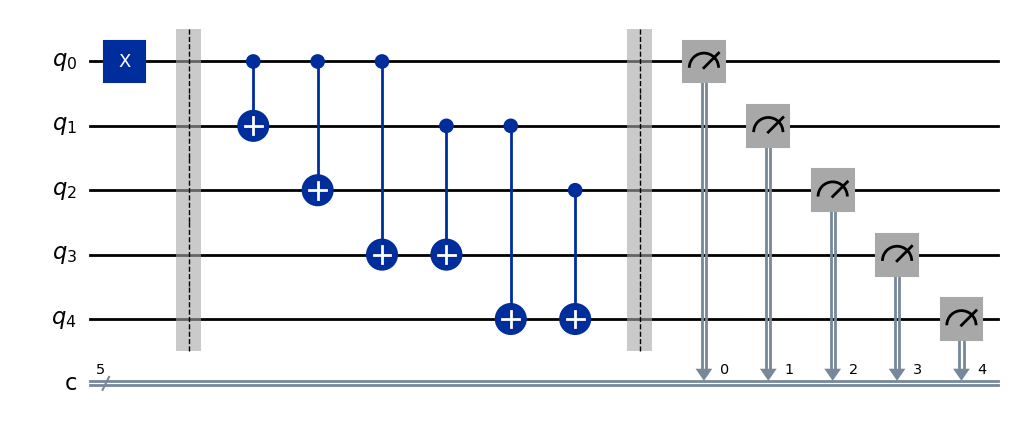

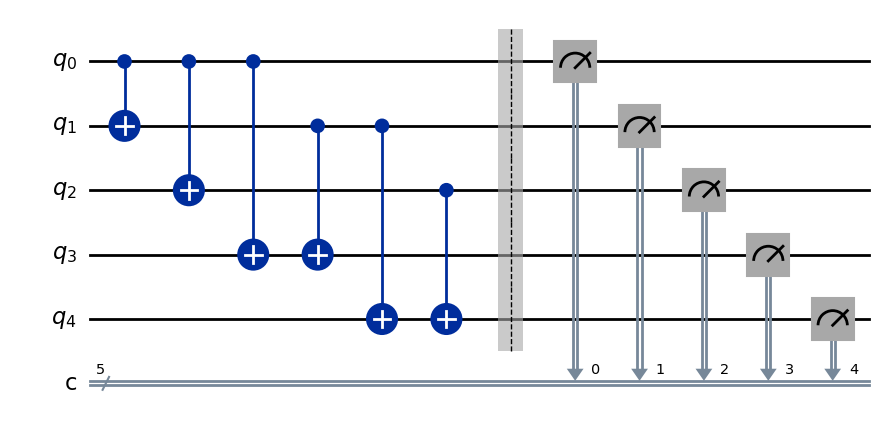

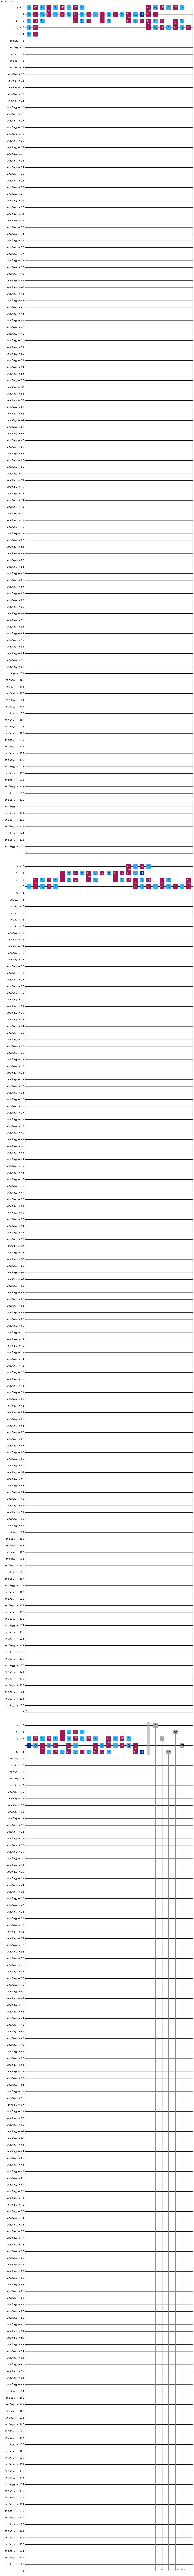

In [ ]:
transpiled_qc1 = repetitonCode(backend=backend)
transpiled_qc_0 = repetitonCodeZero(backend = backend)

# Id circuit for baseline

- for all the chip 
- extra parameter to change the number of gates
- initial experiment 188 gates

In [ ]:
def id_gates(backend, num_gates):
    qcId = QuantumCircuit(127)
    for i in range(num_gates):
        for j in range(127):
            qcId.id(j)
            qcId.barrier(j)
    qcId.measure_all()
    pass_manager = generate_preset_pass_manager(
    optimization_level=0, backend=backend )
    transpiled_qc1 = pass_manager.run(qcId)
    #display( transpiled_qc1.draw("mpl"))
    return transpiled_qc1

- for the first 5 qubits

In [ ]:
def id_gates_5(backend, num_gates):
    qcId = QuantumCircuit(5)
    for i in range(num_gates):
        for j in range(5):
            qcId.id(j)
            qcId.barrier(j)
    qcId.measure_all()
    pass_manager = generate_preset_pass_manager(
    optimization_level=0, backend=backend,
     initial_layout= [ 0,1,2,3,4] )
    transpiled_qc1 = pass_manager.run(qcId)
    #display( transpiled_qc1.draw("mpl"))
    return transpiled_qc1

In [ ]:
qcId5 = id_gates_5(backend, num_gates= 188)
qc3 = id_gates(backend, num_gates = 187)

# determine the execution time of circuits

In [ ]:
def getExecTime(num_iter, qc):
    exec_time = 0
    for c in range(num_iter):
    
        scheduled_circuit = schedule(qc, backend=backend)
        circuit_duration = scheduled_circuit.duration * backend.configuration().dt    
        exec_time += circuit_duration*1000*1000*1000

    print("execution time    {:}[ns]".format(exec_time/num_iter))

- determine number of gates for the baseline

In [ ]:
getExecTime(10, qc3) # baseline
getExecTime(10, transpiled_qc1) # repetion from |111>
getExecTime(10, transpiled_qc_0)


execution time    11854.22222222222[ns]
execution time    11896.888888888889[ns]
execution time    11840.0[ns]


# run baseline experiment for fist 5 qubits and save into csv

In [ ]:
sampler = Sampler(mode=backend)
job = sampler.run([qcId5], shots=10000)
print("Job ID:", job.job_id())

result = job.result()[0]

counts = result.join_data().get_counts()

print("Counts from hardware:", counts)

with open("job_results_from_baseline0.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write a header row
    writer.writerow(["Job ID", "State", "Count"])
    writer.writerow([job.job_id()])
    # Write each state and its corresponding count
    for state, count in counts.items():
        writer.writerow([state, count])

# run repetition code experiment and save it into csv

- should be a method here :)

In [ ]:
sampler = Sampler(mode=backend)
job = sampler.run([transpiled_qc1], shots=10000)
print("Job ID:", job.job_id())

result = job.result()[0]

counts = result.join_data().get_counts()

print("Counts from hardware:", counts)

with open("job_results_from_repetiton1.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write a header row
    writer.writerow(["Job ID", "State", "Count"])
    writer.writerow([job.job_id()])
    # Write each state and its corresponding count
    for state, count in counts.items():
        writer.writerow([state, count])

- below repetion for |000>

In [ ]:
sampler = Sampler(mode=backend)
job = sampler.run([transpiled_qc_0], shots=10000)
print("Job ID:", job.job_id())

result = job.result()[0]

counts = result.join_data().get_counts()

print("Counts from hardware:", counts)

with open("job_results_from_repetiton0.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write a header row
    writer.writerow(["Job ID", "State", "Count"])
    writer.writerow([job.job_id])
    # Write each state and its corresponding count
    for state, count in counts.items():
        writer.writerow([state, count])

In [ ]:
job_id = "cz2pfmpkvm9g008fx61g"  # id for the id baseline with 0 start state 
service = QiskitRuntimeService()

retrieved_job = service.job(job_id)
result = retrieved_job.result()[0]
counts = result.join_data().get_counts()


with open("job_results_from_baseline0.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write a header row
    writer.writerow(["Job ID", "State", "Count"])
    writer.writerow([job_id])
    # Write each state and its corresponding count
    for state, count in counts.items():
        writer.writerow([state, count])

- if needed can save job into csv based on id



In [ ]:
def get_and_save_job_results(job_id, filename="job_results.csv"):
    """
    Retrieves results from an IBM Quantum job and saves them to a CSV file.

    Args:
        job_id (str): The ID of the IBM Quantum job.
        filename (str): The name of the CSV file to save the results to.
    """
    try:
        service = QiskitRuntimeService()
        retrieved_job = service.job(job_id)
        result = retrieved_job.result()[0] # get the first result.
        counts = result.join_data().get_counts()

        with open(filename, "a", newline="") as csvfile:
            writer = csv.writer(csvfile)

            # Check if the file is empty and write the header if it is.
            if csvfile.tell() == 0:
                writer.writerow(["Job ID", "State", "Count"])

            writer.writerow([job_id]) #write the job id
            for state, count in counts.items():
                writer.writerow([state, count])

        print(f"Results for job ID '{job_id}' saved to '{filename}'")

    except Exception as e:
        print(f"An error occurred: {e}")

# methods for creating needed dictionaries

- dictionary for results 
- key binary rep of state 
- value -> count value 

In [ ]:

def create_dictionaries(numberQubits):

    resultsDic = {}
    for i in range(2 ** numberQubits):
        key = format(i, f"0{numberQubits}b")
        resultsDic[key] = 0
    return resultsDic


- baseline dictionary
- key Q0_0 - quibit 0 in starea 0   
      Q0_1 - quibit 0 in starea 1  

In [ ]:
def create_baseline_results(nrQubits):
    results = {}
    for i in range(2 * nrQubits):
        key = f"Q{i // 2}_{i % 2}"
        results[key] = 0
    return results

- error dictionary

In [ ]:
def init_error_dict(num_qubits=5):
    return {f"E{i}": 0 for i in range(num_qubits)}

- print if needed 

In [ ]:
resultDictonary = create_dictionaries(5)
print(resultDictonary)

dummny = create_baseline_results(5)
print(dummny)

# read csv and process data

- read data from csv
- return list of dictionaries, each experiment has it's own dictionary 

In [ ]:
import csv

def read_data(filename, numberQubits):
    experiments = []         # List to store a dictionary for each experiment
    current_experiment = None
    skip_row = False

    with open(filename, mode='r') as file:
        csv_file = csv.reader(file)
        for row in csv_file:
            # Identify the start of a new experiment using "Job ID"
            if row and "Job ID" in row[0]:
                if current_experiment is not None:
                    experiments.append(current_experiment)
                current_experiment = create_dictionaries(numberQubits)
                skip_row = True
                continue

            # Skip row immediately after the header if needed
            if skip_row:
                skip_row = False
                continue

            # Process the data row
            state = row[0].strip()          # Remove any leading/trailing spaces
            count_str = row[1].strip()        # Get the count as a string
            try:
                # Instead of adding to an existing value, assign the integer value directly
                current_experiment[state] = int(count_str)
            except ValueError as e:
                print(f"Error converting row {row}: {e}")
                continue

    # Append the last experiment if it exists
    if current_experiment is not None:
        experiments.append(current_experiment)

    return experiments




# read all experiments

In [ ]:
numberQubits = 5
experimetBaseline0 = read_data("job_results_from_baseline0.csv", numberQubits)
experimetBaseline1 = read_data("job_results_from_1.csv", numberQubits)
experimentRepetiton0 = read_data("job_results_from_repetiton0.csv", numberQubits)
experimentRepetiton1 = read_data("job_results_from_repetiton1.csv", numberQubits)

- print if needed

In [ ]:
print("baseline experiment")
for i, exp in enumerate(experimetBaseline0, start=1):
    print(f"Experiment {i}: {exp}")
print("\n")

print("baseline experiment from 1")
for i, exp in enumerate(experimetBaseline1, start=1):
    print(f"Experiment {i}: {exp}")
print("\n")

print("repetition from 0")
for i, exp in enumerate(experimentRepetiton0, start=1):
    print(f"Experiment {i}: {exp}")
print("\n")

print("repetition from 1")
for i, exp in enumerate(experimentRepetiton1, start=1):
    print(f"Experiment {i}: {exp}")


baseline experiment
Experiment 1: {'00000': 9204, '00001': 35, '00010': 214, '00011': 1, '00100': 187, '00101': 0, '00110': 6, '00111': 0, '01000': 112, '01001': 0, '01010': 4, '01011': 0, '01100': 4, '01101': 0, '01110': 0, '01111': 0, '10000': 217, '10001': 3, '10010': 2, '10011': 0, '10100': 5, '10101': 0, '10110': 0, '10111': 0, '11000': 6, '11001': 0, '11010': 0, '11011': 0, '11100': 0, '11101': 0, '11110': 0, '11111': 0}
Experiment 2: {'00000': 9163, '00001': 26, '00010': 204, '00011': 0, '00100': 217, '00101': 2, '00110': 4, '00111': 0, '01000': 120, '01001': 1, '01010': 3, '01011': 0, '01100': 1, '01101': 0, '01110': 0, '01111': 0, '10000': 244, '10001': 0, '10010': 5, '10011': 0, '10100': 4, '10101': 0, '10110': 0, '10111': 0, '11000': 6, '11001': 0, '11010': 0, '11011': 0, '11100': 0, '11101': 0, '11110': 0, '11111': 0}
Experiment 3: {'00000': 7883, '00001': 23, '00010': 192, '00011': 0, '00100': 172, '00101': 0, '00110': 3, '00111': 0, '01000': 392, '01001': 1, '01010': 17, 

# baseline results

In [ ]:
def results(experiment_list, numberQubits):
    results_list = []
    for result in experiment_list:
        baseline_dict = create_baseline_results(numberQubits)  #initialize keys to 0, "Q0_0", "Q0_1", ...
        for key, value in result.items():
            if value != 0:
               
                for i in range(numberQubits):
                    if key[i] == '0':
                        # Use formatted key name, e.g., "Q0_0", and add the value
                        baseline_dict[f"Q{numberQubits - 1 - i}_0"] += value #becasue qiskit is in little endian 
                    else:
                        baseline_dict[f"Q{numberQubits - 1 - i}_1"] += value
        results_list.append(baseline_dict)
    return results_list

- results for |00000>

In [ ]:
results_list_baseline0 = results(experimetBaseline0, 5)

for dictionary in results_list_baseline0:
    print("Dictionary contents:")
    for key, value in dictionary.items():
        print(f"{key}: {value}")
    print()

Dictionary contents:
Q0_0: 9961
Q0_1: 39
Q1_0: 9773
Q1_1: 227
Q2_0: 9798
Q2_1: 202
Q3_0: 9874
Q3_1: 126
Q4_0: 9767
Q4_1: 233

Dictionary contents:
Q0_0: 9971
Q0_1: 29
Q1_0: 9784
Q1_1: 216
Q2_0: 9772
Q2_1: 228
Q3_0: 9869
Q3_1: 131
Q4_0: 9741
Q4_1: 259

Dictionary contents:
Q0_0: 9973
Q0_1: 27
Q1_0: 9747
Q1_1: 253
Q2_0: 9792
Q2_1: 208
Q3_0: 9536
Q3_1: 464
Q4_0: 8687
Q4_1: 1313

Dictionary contents:
Q0_0: 9964
Q0_1: 36
Q1_0: 9725
Q1_1: 275
Q2_0: 9794
Q2_1: 206
Q3_0: 9562
Q3_1: 438
Q4_0: 8600
Q4_1: 1400

Dictionary contents:
Q0_0: 9952
Q0_1: 48
Q1_0: 9741
Q1_1: 259
Q2_0: 9817
Q2_1: 183
Q3_0: 9460
Q3_1: 540
Q4_0: 8658
Q4_1: 1342

Dictionary contents:
Q0_0: 9922
Q0_1: 78
Q1_0: 9759
Q1_1: 241
Q2_0: 9792
Q2_1: 208
Q3_0: 9867
Q3_1: 133
Q4_0: 9814
Q4_1: 186

Dictionary contents:
Q0_0: 9936
Q0_1: 64
Q1_0: 9780
Q1_1: 220
Q2_0: 9785
Q2_1: 215
Q3_0: 9863
Q3_1: 137
Q4_0: 9815
Q4_1: 185

Dictionary contents:
Q0_0: 9921
Q0_1: 79
Q1_0: 9787
Q1_1: 213
Q2_0: 9775
Q2_1: 225
Q3_0: 9860
Q3_1: 140
Q4_0: 9844


- results for |11111>

In [ ]:
results_list_baseline1 = results(experimetBaseline1, 5)
for dictionary in results_list_baseline1:
    print("Dictionary contents:")
    for key, value in dictionary.items():
        print(f"{key}: {value}")
    print()

Dictionary contents:
Q0_0: 528
Q0_1: 9472
Q1_0: 506
Q1_1: 9494
Q2_0: 583
Q2_1: 9417
Q3_0: 509
Q3_1: 9491
Q4_0: 495
Q4_1: 9505

Dictionary contents:
Q0_0: 336
Q0_1: 9664
Q1_0: 412
Q1_1: 9588
Q2_0: 564
Q2_1: 9436
Q3_0: 511
Q3_1: 9489
Q4_0: 1219
Q4_1: 8781

Dictionary contents:
Q0_0: 352
Q0_1: 9648
Q1_0: 495
Q1_1: 9505
Q2_0: 514
Q2_1: 9486
Q3_0: 322
Q3_1: 9678
Q4_0: 579
Q4_1: 9421

Dictionary contents:
Q0_0: 366
Q0_1: 9634
Q1_0: 469
Q1_1: 9531
Q2_0: 534
Q2_1: 9466
Q3_0: 411
Q3_1: 9589
Q4_0: 578
Q4_1: 9422

Dictionary contents:
Q0_0: 353
Q0_1: 9647
Q1_0: 502
Q1_1: 9498
Q2_0: 520
Q2_1: 9480
Q3_0: 388
Q3_1: 9612
Q4_0: 518
Q4_1: 9482

Dictionary contents:
Q0_0: 531
Q0_1: 9469
Q1_0: 476
Q1_1: 9524
Q2_0: 573
Q2_1: 9427
Q3_0: 382
Q3_1: 9618
Q4_0: 538
Q4_1: 9462

Dictionary contents:
Q0_0: 315
Q0_1: 9685
Q1_0: 546
Q1_1: 9454
Q2_0: 519
Q2_1: 9481
Q3_0: 422
Q3_1: 9578
Q4_0: 553
Q4_1: 9447

Dictionary contents:
Q0_0: 355
Q0_1: 9645
Q1_0: 515
Q1_1: 9485
Q2_0: 563
Q2_1: 9437
Q3_0: 572
Q3_1: 9428
Q4_0:

# baseline error

- divide by number of shots

In [ ]:
def error_rate(resultList, nrShots):
    error_rate_list = []  # List to hold new dictionaries
    for results in resultList:
        error_dict = {}  # New dictionary for error rates
        for key, value in results.items():
            error_dict[key] = value / nrShots  # Calculate and store error rate
        error_rate_list.append(error_dict)  # Add to list
    return error_rate_list

In [ ]:
nr_shots = 10000

error_list_baseline0 = error_rate(results_list_baseline0, nrShots=nr_shots )


error_list_baseline1 = error_rate(results_list_baseline1, nrShots=nr_shots )


- method to print error list

In [ ]:
def print_error_list(error_list):
    for dictionary in error_list:
        print("Error contents:")
        for key, value in dictionary.items():
            print(f"{key}: {value}")
        print()

In [ ]:
print("baseline 0")
print_error_list(error_list_baseline0)
print("baseline 1")
print_error_list(error_list_baseline1)


baseline 0
Error contents:
Q0_0: 0.9961
Q0_1: 0.0039
Q1_0: 0.9773
Q1_1: 0.0227
Q2_0: 0.9798
Q2_1: 0.0202
Q3_0: 0.9874
Q3_1: 0.0126
Q4_0: 0.9767
Q4_1: 0.0233

Error contents:
Q0_0: 0.9971
Q0_1: 0.0029
Q1_0: 0.9784
Q1_1: 0.0216
Q2_0: 0.9772
Q2_1: 0.0228
Q3_0: 0.9869
Q3_1: 0.0131
Q4_0: 0.9741
Q4_1: 0.0259

Error contents:
Q0_0: 0.9973
Q0_1: 0.0027
Q1_0: 0.9747
Q1_1: 0.0253
Q2_0: 0.9792
Q2_1: 0.0208
Q3_0: 0.9536
Q3_1: 0.0464
Q4_0: 0.8687
Q4_1: 0.1313

Error contents:
Q0_0: 0.9964
Q0_1: 0.0036
Q1_0: 0.9725
Q1_1: 0.0275
Q2_0: 0.9794
Q2_1: 0.0206
Q3_0: 0.9562
Q3_1: 0.0438
Q4_0: 0.86
Q4_1: 0.14

Error contents:
Q0_0: 0.9952
Q0_1: 0.0048
Q1_0: 0.9741
Q1_1: 0.0259
Q2_0: 0.9817
Q2_1: 0.0183
Q3_0: 0.946
Q3_1: 0.054
Q4_0: 0.8658
Q4_1: 0.1342

Error contents:
Q0_0: 0.9922
Q0_1: 0.0078
Q1_0: 0.9759
Q1_1: 0.0241
Q2_0: 0.9792
Q2_1: 0.0208
Q3_0: 0.9867
Q3_1: 0.0133
Q4_0: 0.9814
Q4_1: 0.0186

Error contents:
Q0_0: 0.9936
Q0_1: 0.0064
Q1_0: 0.978
Q1_1: 0.022
Q2_0: 0.9785
Q2_1: 0.0215
Q3_0: 0.9863
Q3_1: 0.

In [58]:
def calculate_error_means(error_list, num_qubits, suffix="_1"):

    # Initialize dictionary with zeros (assumes init_error_dict is defined elsewhere)
    error_mean_dict = init_error_dict(num_qubits)
    
    # Sum up all error values for keys ending with the given suffix
    for error in error_list:
        for key, value in error.items():
            if key.endswith(suffix):
                # Extract the index from key (e.g., from "Q0_1" get "0")
                index = key[1:key.index("_")]
                new_key = f"E{index}"
                error_mean_dict[new_key] += value
    
    # Determine the divisor based on the suffix
    divisor = len(error_list) 
    
    # Calculate means by dividing the sum by the appropriate divisor
    for key in error_mean_dict:
        error_mean_dict[key] = error_mean_dict[key] / divisor

    return len(error_list), error_mean_dict


In [57]:
n0, mean_error_dic_baseline0 = calculate_error_means(error_list_baseline0,num_qubits = 5, suffix="_1" )
n1, mean_error_dic_baseline1 = calculate_error_means(error_list_baseline1,num_qubits = 5, suffix="_0" )


print("baseline 0 - " + "number of experiments:" + str(n0))
print(mean_error_dic_baseline0)

print("baseline 1 - " + "number of experiments:" + str(n1))
print(mean_error_dic_baseline1)

baseline 0 - number of experiments:11
{'E0': 0.005372727272727273, 'E1': 0.0236, 'E2': 0.02094545454545454, 'E3': 0.02265454545454546, 'E4': 0.051445454545454544}
baseline 1 - number of experiments:10
{'E0': 0.03856, 'E1': 0.048679999999999994, 'E2': 0.054610000000000006, 'E3': 0.04256, 'E4': 0.06155000000000001}


# repetition results

- preporcess the data

- method to flip a bit from a key

In [56]:
def flip_bit(key, position):
    key_list = list(key)
    key_list[position] = '1' if key_list[position] == '0' else '0'
    new_key_string = "".join(key_list) # Create a new string
    return new_key_string # return the new string   

- flip based on stabilizer

In [ ]:
def preprocessRepetition(list_experiments):
    results_list = []
    for result in list_experiments:
        repetition_dict = create_dictionaries(5)
        for key, value in result.items():
            # apply correction
            if key[0] == '0' and key[1] =='0':
                repetition_dict[key] += result[key] # no flip 
            if key[0] == '0' and key[1] =='1': ## flip first qubit
                newKey =  flip_bit(key, 4)
                repetition_dict[newKey] += value
            if key[0] == '1' and key[1] =='1': # flip middle
                newKey =  flip_bit(key, 3)
                repetition_dict[newKey] += value
            if key[0] == '1' and key[1] =='0':  #flip last
                newKey =  flip_bit(key, 2)
                repetition_dict[newKey] += value
                 
        results_list.append(repetition_dict)    
    return results_list

- apply error correction

In [63]:
repetion_preporcess_list_repetition0 = preprocessRepetition(experimentRepetiton0)
print(repetion_preporcess_list_repetition0)
repetion_preporcess_list_repetition1 = preprocessRepetition(experimentRepetiton1)
print(repetion_preporcess_list_repetition1)

[{'00000': 4455, '00001': 310, '00010': 130, '00011': 19, '00100': 326, '00101': 30, '00110': 70, '00111': 56, '01000': 590, '01001': 615, '01010': 16, '01011': 81, '01100': 105, '01101': 65, '01110': 42, '01111': 264, '10000': 704, '10001': 118, '10010': 84, '10011': 45, '10100': 141, '10101': 25, '10110': 129, '10111': 96, '11000': 448, '11001': 62, '11010': 63, '11011': 24, '11100': 120, '11101': 32, '11110': 181, '11111': 554}, {'00000': 4093, '00001': 393, '00010': 116, '00011': 20, '00100': 382, '00101': 40, '00110': 73, '00111': 96, '01000': 621, '01001': 630, '01010': 42, '01011': 75, '01100': 112, '01101': 69, '01110': 60, '01111': 278, '10000': 717, '10001': 136, '10010': 73, '10011': 70, '10100': 96, '10101': 22, '10110': 106, '10111': 93, '11000': 408, '11001': 76, '11010': 58, '11011': 25, '11100': 115, '11101': 63, '11110': 189, '11111': 653}, {'00000': 4354, '00001': 257, '00010': 139, '00011': 24, '00100': 432, '00101': 37, '00110': 82, '00111': 80, '01000': 545, '01001

- method that calculates repetion code error after correction
- if != |000> or |111> - error
- last it makes mean of all the experiments error

In [ ]:
def calculate_normalized_error_mean(list_resutls, zeroState, nr_shots ):

    count_list = []

    # Process each dictionary in the list
    for dictionary in list_resutls:
        count = 0
        for key, value in dictionary.items():
            if zeroState == True:
            # Check if the third, fourth, and fifth characters are '0'
                if key[2] == '0' and key[3] == '0' and key[4] == '0':
                     count += value
            else:
                if  key[2] == '1' and key[3] == '1' and key[4] == '1':
                 count += value
        # Calculate the normalized value for this dictionary
        normalized_value = (nr_shots - count) / nr_shots 
        count_list.append(normalized_value)
    
    # Calculate the mean of the normalized values
    if count_list:
        mean_value = sum(count_list) / len(count_list)
    else:
        mean_value = 0

    return count_list, mean_value

In [64]:
count_list_zero, mean_zero = calculate_normalized_error_mean(repetion_preporcess_list_repetition0, True, 10000)
count_list_one, mean_one = calculate_normalized_error_mean(repetion_preporcess_list_repetition1,zeroState =  False, nr_shots = 10000)
print("error list repetion from |000> state")
print(count_list_zero)
print("mean")
print(mean_zero)
print("error list repetion from |111> state")
print(count_list_one)
print("mean")
print(mean_one)


error list repetion from |000> state
[0.3803, 0.4161, 0.3902, 0.4159, 0.2815, 0.3148, 0.2825, 0.2915, 0.2953, 0.3234]
mean
0.33915
error list repetion from |111> state
[0.4248, 0.4292, 0.3973, 0.3803, 0.352, 0.3673, 0.3296, 0.353, 0.3559, 0.3718]
mean
0.37612


# write results into csv

- method that writes a dictionary into csv

In [ ]:
def write_dict_to_csv(data_dict, filename, mode):

    with open(filename, mode, newline='') as csvfile:
        writer = csv.writer(csvfile)
        
        # Write the header row
        writer.writerow(['Key', 'Value'])
        
        # Write the data rows
        for key, value in data_dict.items():
            writer.writerow([key, value])